### UC00182_Elderly_Social_Support_Networks

<div class="usecase-authors"><b>Authored by: </b>Nelkin Eldho</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, Matplotlib, Sklearn, Seaborn, Folium, Geopy</div>
</div>

### Objective:
To analyse, visualise and model the accessibility and availability of social support networks for elderly residents (60 years and over) in Melbourne, using public datasets to identify service gaps, accessibility challenges and areas for improvement.

### Scenario:
These are practical and data-driven questions that this project can aim to answer:

1. Which areas in Melbourne have the highest elderly populations?

2. Are there enough public toilets accessible near elderly population clusters?

3. Are affordable support services (e.g., meals, aged care, housing help) evenly distributed?

4. What percentage of these services are accessible via public transport?

5. Which areas should be prioritised for adding new services or infrastructure?

### What you will learn from this use case
This Use case provides hands-on experience in analysing the accessibility and availability of social support networks for elderly residents. It will help uncover:
1. Public health and welfare planning for ageing populations.

2. Urban infrastructure and spatial equity.

3. Challenges in real-world open data analysis (missing values, granularity, etc.).

### Introduction:
As Melbourne’s population ages, ensuring that elderly residents have access to vital support services, such as public toilets, community centers and low-cost welfare services, is critical for social inclusion, dignity and quality of life. This project aims to develop a data-driven understanding of how effectively Melbourne’s social infrastructure supports its elderly citizens.

Using open datasets from the City of Melbourne, the project will examine spatial patterns, accessibility and distribution of support services. Insights from this project can guide stakeholders (such as councils, health planners and NGOs) to improve resource allocation, infrastructure planning and social policies that enhance elderly well-being.

**Datasets:**

https://data.melbourne.vic.gov.au/explore/dataset/older-people-profile-2016-60-years-and-over/information/

https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/

https://data.melbourne.vic.gov.au/explore/dataset/free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-/table/

### 1.2 Loading Datasets using APIs

In [22]:
import pandas as pd 
import requests
from io import StringIO
 
#API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'older-people-profile-2016-60-years-and-over'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'public-toilets'
url_2 = f"{base_url_2}{dataset_id_2}/exports/csv"

#API details for the third dataset
base_url_3 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_3 = 'free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-'
url_3 = f"{base_url_3}{dataset_id_3}/exports/csv"


 
#Fetching the first dataset for older people
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
  
#Fetching the second dataset for public toilets
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')

#Fetching the third dataset for support services
response_3 = requests.get(url_3)
df_3 = pd.read_csv(StringIO(response_3.text), delimiter=';')

print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

print("Column Names for third dataset")
print(df_3.columns.tolist())

Column Names for first dataset
['profile', 'census_year', 'category', 'sub_category', 'sub_order', 'value']
Column Names for second dataset
['name', 'female', 'male', 'wheelchair', 'operator', 'baby_facil', 'lat', 'lon', 'location']
Column Names for third dataset
['name', 'what', 'who', 'address_1', 'address_2', 'suburb', 'phone', 'phone_2', 'free_call', 'email', 'website', 'twitter', 'social_media', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'public_holidays', 'cost', 'tram_routes', 'bus_routes', 'nearest_train_station', 'category_1', 'category_2', 'category_3', 'category_4', 'category_5', 'category_6', 'longitude', 'latitude', 'geocoded_location']


Now we assign df_1, df_2 and df_3 to new variables df_old, df_toilet and df_services respectively which are easily readable for anyone

In [23]:
df_old = df_1
df_toilet = df_2
df_services = df_3

In [24]:
print("Display first 5 rows of Older People Profile Dataset:")
print(df_old.head())

Display first 5 rows of Older People Profile Dataset:
                            profile  census_year        category  \
0  Older people (60 years and over)         2016          Gender   
1  Older people (60 years and over)         2016             Age   
2  Older people (60 years and over)         2016             Age   
3  Older people (60 years and over)         2016  Age and gender   
4  Older people (60 years and over)         2016  Age and gender   

       sub_category  sub_order  value  
0            Female          2   6484  
1    Under 60 years          1      0  
2       65-69 years          3   3187  
3  Male 60-64 years          2   1781  
4  Male 75-79 years          5    686  


In [25]:
print("Display first 5 rows of Public Toilets Dataset:")
print(df_toilet.head())

Display first 5 rows of Public Toilets Dataset:
                                                name female male wheelchair  \
0        Public Toilet - Toilet 107 - Alexandra Park    yes  yes        yes   
1  Public Toilet - Toilet 1 - Lonsdale Street (Op...    yes  yes        yes   
2  Public Toilet - Toilet 145 - Carlton Gardens S...    yes  yes        yes   
3  Public Toilet - Toilet 7 - Latrobe Street (Adj...     no  yes         no   
4  Public Toilet - Toilet 138 - Carlton Gardens N...    yes  yes        yes   

            operator baby_facil        lat         lon  \
0  City of Melbourne         no -37.827643  144.981812   
1  City of Melbourne         no -37.814346  144.955118   
2  City of Melbourne         no -37.806259  144.969203   
3  City of Melbourne         no -37.808942  144.965649   
4  City of Melbourne         no -37.802646  144.969821   

                                 location  
0   -37.82764304616528, 144.9818116607595  
1  -37.814345522392365, 144.955117946437

In [26]:
print("Display first 5 rows of Free and cheap support services Dataset:")
print(df_services.head())

Display first 5 rows of Free and cheap support services Dataset:
                           name  \
0                      COHEALTH   
1        COHEALTH - Inner Space   
2         Open Family Australia   
3  Salvation Army – Project 614   
4       Stopover Youth Services   

                                                what  \
0  range of health and welfare services, drug and...   
1  Cohealth’s primary health service for people w...   
2  Outreach service for young people 10-25 years,...   
3                                                NaN   
4  crisis refuge accommodation\nadvocacy and gene...   

                                                 who address_1  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2      Outreach service for young people 10-25 years       NaN   
3                                                NaN       NaN   
4  Housing support program offered for 16-24 year...     

### 1.3 Cleaning Dataset and Preprocessing

Now we proceed with cleaning the dataset by initially searching for missing values.

In [27]:
# Checking for missing values in all three datasets
print("Missing values in df_old:")
print(df_old.isnull().sum())

print("\nMissing values in df_toilet:")
print(df_toilet.isnull().sum())

print("\nMissing values in df_services:")
print(df_services.isnull().sum())


Missing values in df_old:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64

Missing values in df_toilet:
name          0
female        1
male          1
wheelchair    1
operator      0
baby_facil    0
lat           0
lon           0
location      0
dtype: int64

Missing values in df_services:
name                       1
what                      22
who                       92
address_1                102
address_2                 29
suburb                    29
phone                     19
phone_2                  115
free_call                 92
email                     69
website                    5
twitter                   57
social_media              58
monday                    31
tuesday                   31
wednesday                 31
thursday                  31
friday                    31
saturday                  32
sunday                    32
public_holidays           32
cost                     

In [28]:
df_old_clean = df_old.copy()

df_toilet_clean = df_toilet.copy()
# Filling missing gender/wheelchair fields
df_toilet_clean[["female", "male", "wheelchair"]] = df_toilet_clean[["female", "male", "wheelchair"]].fillna("unknown")

df_services_clean = df_services.dropna(subset=["latitude", "longitude"]).copy()
# dropping non-critical contact columns if not needed
df_services_clean = df_services_clean.drop(columns=["phone_2", "twitter", "social_media", "free_call"], errors='ignore')
day_cols = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "public_holidays"]
df_services_clean[day_cols] = df_services_clean[day_cols].fillna("unknown")

# Transport fields
df_services_clean["tram_routes"] = df_services_clean["tram_routes"].fillna("unknown")
df_services_clean["bus_routes"] = df_services_clean["bus_routes"].fillna("unknown")
df_services_clean["nearest_train_station"] = df_services_clean["nearest_train_station"].fillna("unknown")

# Category fields
category_cols = [f"category_{i}" for i in range(1, 7)]
df_services_clean[category_cols] = df_services_clean[category_cols].fillna("Other")

df_services_clean["address_1"] = df_services_clean["address_1"].fillna("Unknown")
df_services_clean["email"] = df_services_clean["email"].fillna("Unavailable")
df_services_clean["phone"] = df_services_clean["phone"].fillna("Unavailable")
# Filling out remaining minimal missing values
df_services_clean["what"] = df_services_clean["what"].fillna("Unspecified")
df_services_clean["who"] = df_services_clean["who"].fillna("Not specified")
df_services_clean["website"] = df_services_clean["website"].fillna("Unavailable")
df_services_clean["cost"] = df_services_clean["cost"].fillna("Not specified")

# Checking for any remaining missing values
print("Missing values after cleaning:")

print("\nMissing values in df_toilet after cleaning:")
print(df_toilet_clean.isnull().sum())

print("\nMissing values in df_services after cleaning:")
print(df_services_clean.isnull().sum())


Missing values after cleaning:

Missing values in df_toilet after cleaning:
name          0
female        0
male          0
wheelchair    0
operator      0
baby_facil    0
lat           0
lon           0
location      0
dtype: int64

Missing values in df_services after cleaning:
name                     0
what                     0
who                      0
address_1                0
address_2                0
suburb                   0
phone                    0
email                    0
website                  0
monday                   0
tuesday                  0
wednesday                0
thursday                 0
friday                   0
saturday                 0
sunday                   0
public_holidays          0
cost                     0
tram_routes              0
bus_routes               0
nearest_train_station    0
category_1               0
category_2               0
category_3               0
category_4               0
category_5               0
category_6        

### 1.4 Exploratory Data Aanalysis: 
### Average Number of Services per Suburb

Now, we would be grouping the cleaned df_services_clean dataset by suburb and count how many services are in each, then take the average.

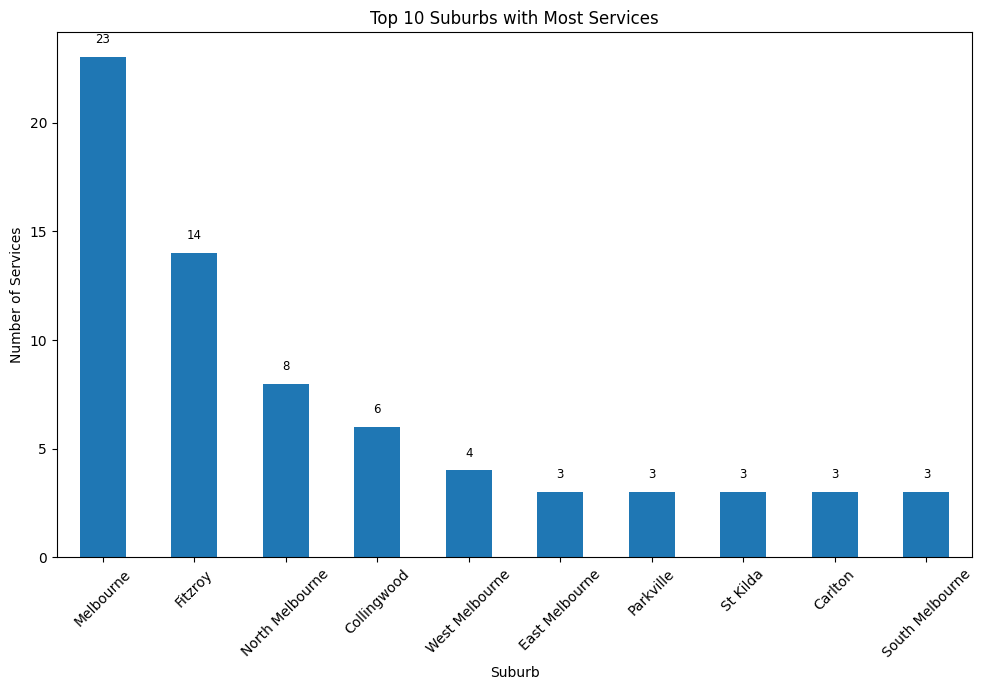

In [29]:
import matplotlib.pyplot as plt

# Counting the services per suburb
services_per_suburb = df_services_clean['suburb'].value_counts()

# Plotting top 10 suburbs
top_suburbs = services_per_suburb.head(10)
ax = top_suburbs.plot(kind='bar', figsize=(10,7), title='Top 10 Suburbs with Most Services')

plt.ylabel("Number of Services")
plt.xlabel("Suburb")
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the value labels on the graph for readability
for i, v in enumerate(top_suburbs.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8.5)

plt.show()


**Results** 

**What We Did:**

Calculated the Average Number of Services per Suburb:

We grouped the data by suburb and calculated the average number of services available for elderly people in each suburb.

**What We Found:**

1. Some suburbs have a noticeably higher average number of elderly services compared to others, indicating that service availability is uneven across locations.

2. Melbourne has the highest number of services, with a total of 23, while East Melbourne, Parkville, St Kilda, Carlton, and South Melbourne have the lowest, with just 3 services each.

3. These lower-ranked suburbs would benefit from implementing more services to better support their elderly residents.


### Top categories of services offered to elderly people

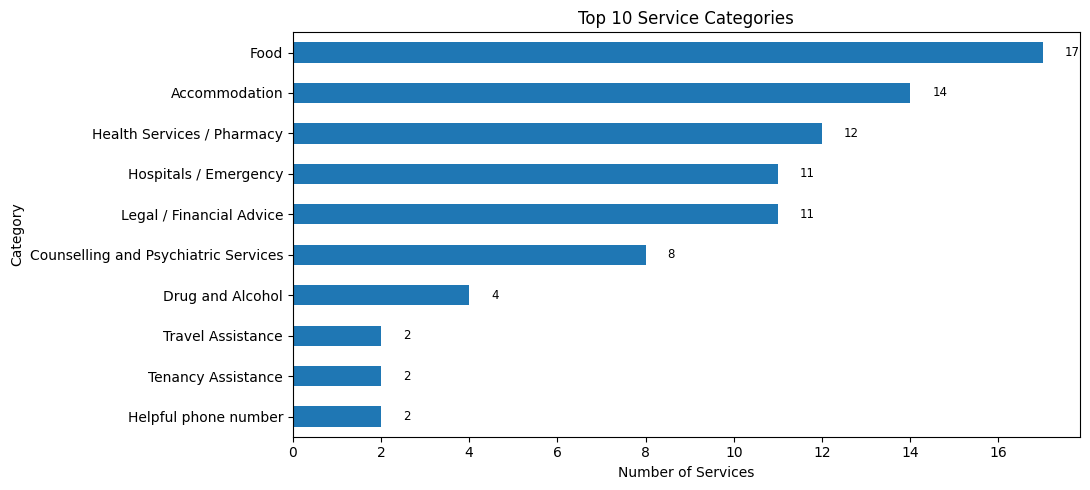

In [30]:
# Counting the top service categories
top_categories = df_services_clean['category_1'].value_counts().head(10)

# Plotting horizontal bar chart
ax = top_categories.plot(kind='barh', figsize=(11,5), title='Top 10 Service Categories')

plt.xlabel("Number of Services")
plt.ylabel("Category")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()

# Adding the value labels on the graph for readability
for i, v in enumerate(top_categories.values):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=8.5)

plt.show()


**Results** 

**What We Did:**

Identified the Top Categories of Services Offered to Elderly People:

We analysed the dataset to identify the Top Categories of Services Offered to Elderly People.
This involved counting the number of services in each category (e.g., healthcare, social support, transport assistance) to determine which types of services are most commonly available.

**What We Found:**

1. Certain categories, such as Healthcare, Financial Support, and Food & Accommodation, appear far more frequently than others, indicating these are the primary areas of focus for elderly assistance.

2. The Food category has the highest number of services at 17.

3. The least-represented categories are Travel Assistance, Tenancy Assistance, and Helpful Phone Numbers.

4. While these lower-frequency services are fewer in number, they are still highly important for elderly citizens. This suggests there is room for improvement in expanding the availability of services in these categories.

In [31]:
import geopandas as gpd
import folium

lat_col = "lat"
lon_col = "lon"

# Dropping rows without coordinates
df = df_toilet_clean.dropna(subset=[lat_col, lon_col])

# Creating an interactive Folium map
center_lat = df[lat_col].mean()
center_lon = df[lon_col].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Adding points to map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=row.get("Name", "Public Toilet")
    ).add_to(m)

# Saving and displaying the map
m.save("public_toilets_map.html")
m

**Insights** 

From the above geospatial analysis, it is clear that public toilets are more densely located around Melbourne’s central business district, with significantly fewer options in suburban and outer areas. This uneven distribution can impact various groups, especially those who rely on accessible facilities.

**Who is Affected?**

Elderly individuals: May require frequent rest stops during outings, but facilities are scarce in certain regions.

People with disabilities: Limited availability of toilets with wheelchair access in suburban areas makes travel challenging.

Parents with young children: Need accessible toilets and baby change facilities during travel, especially on longer trips.

Tourists and visitors: Lack of visible public toilet infrastructure in some high-traffic tourist zones outside the CBD can reduce comfort and convenience.


**What Can Be Done?**

Increase distribution: Develop more public toilets in suburban areas and along major transport routes.

Accessibility upgrades: Ensure more toilets include wheelchair access, tactile signage, and other disability-friendly features.

Real-time availability mapping: Integrate live toilet availability data into public transport and city navigation apps.

Tourist-focused planning: Install public toilets near key tourist attractions outside the CBD to support visitor comfort.

Community engagement: Consult with disability advocacy groups, parents, and local businesses to identify priority installation areas.